# Analysis

#### This Notebook contains all the plots for the analysis in the pre-processing and the evaluation of the model

In [139]:
import pandas as pd

In [140]:
path = '/Users/gouse/PycharmProjects/NLP/labs_2023_2024/CW/data/baseline_preprocessed_csvs'
all_df = pd.read_csv(path+'/dontpatronizeme_pcl.csv')
all_df.dropna(inplace=True)
all_df

,par_id,art_id,keyword,country_code,text,label,binary_label
0,1,24942188,hopeless,ph,"We 're living in times of absolute insanity , ...",0.0,0.0
1,2,21968160,migrant,gh,"In Libya today , there are countless number of...",0.0,0.0
2,3,16584954,immigrant,ie,"""White House press secretary Sean Spicer said ...",0.0,0.0
3,4,7811231,disabled,nz,Council customers only signs would be displaye...,0.0,0.0
4,5,1494111,refugee,ca,""""""" Just like we received migrants fleeing El ...",0.0,0.0
...,...,...,...,...,...,...,...
10463,10464,19612634,disabled,ie,"""When Marie O'Donoghue went looking for a spec...",0.0,0.0
10464,10465,14297363,women,lk,"""Sri Lankan norms and culture inhibit women fr...",1.0,0.0
10465,10466,70091353,vulnerable,ph,He added that the AFP will continue to bank on...,0.0,0.0
10466,10467,20282330,in-need,ng,""""""" She has one huge platform , and informatio...",3.0,1.0


In [141]:
all_df[all_df['par_id'] == 9]['text'].tolist()

['NUEVA ERA , Ilocos Norte - No family shall be homeless under the watch of the municipal government here , said town Mayor Aldrin Garvida .']

In [142]:
all_df['text'].tolist()[1]

"In Libya today , there are countless number of Ghanaian and Nigerian immigrants . These are the two countries with key macroeconomic challenges including unemployment . Let 's tackle this issue from the root and not the fruit . Thank you"

In [143]:
# condition a dataframe with binary_label ==0 and label == 1
all_df[(all_df['binary_label'] == 1) & (all_df['label'] == 3)]

,par_id,art_id,keyword,country_code,text,label,binary_label
33,34,24150149,disabled,ng,Fast food employee who fed disabled man become...,3.0,1.0
41,42,4591694,hopeless,jm,Vanessa had feelings of hopelessness in her fi...,3.0,1.0
76,77,22454828,homeless,nz,"In September , Major Nottle set off on foot fr...",3.0,1.0
82,83,4672144,homeless,pk,The demographics of Pakistan and India are ver...,3.0,1.0
106,107,16900972,homeless,ke,"""His present """" chambers """" may be quite humbl...",3.0,1.0
...,...,...,...,...,...,...,...
10406,10407,1811952,in-need,tz,"""He said his decision to help those in need di...",3.0,1.0
10407,10408,4542224,homeless,my,""""""" Most of them ( the homeless ) have the abi...",3.0,1.0
10423,10424,4665292,women,jm,""""""" I do n't believe in abortion , I think it ...",3.0,1.0
10444,10445,3923193,refugee,gb,More than 150 volunteers spent the night in ' ...,3.0,1.0


### Pre-processing Plots

In [144]:
all_df['label'] = all_df['label'].astype('int')
all_df['binary_label'] = all_df['binary_label'].astype('int')

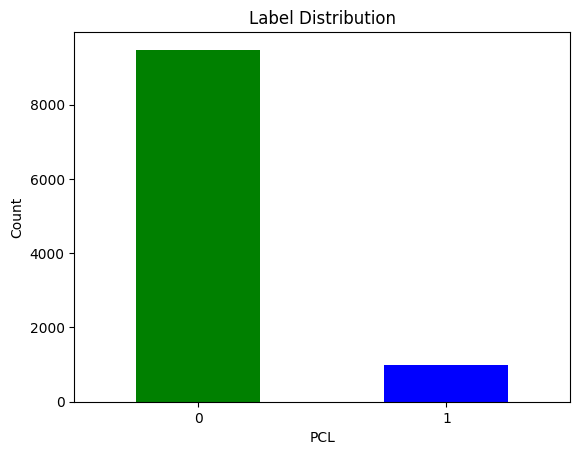

In [145]:
# A] Make a bar plot based on the column label. Put a different color for each label. Put a title and label the axes.
# make the x axis angle 0. Convert x axis to integers
import matplotlib.pyplot as plt

all_df['binary_label'].value_counts().sort_index().plot(kind='bar', color=['green', 'blue'])
plt.title('Label Distribution')
plt.xlabel('PCL')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

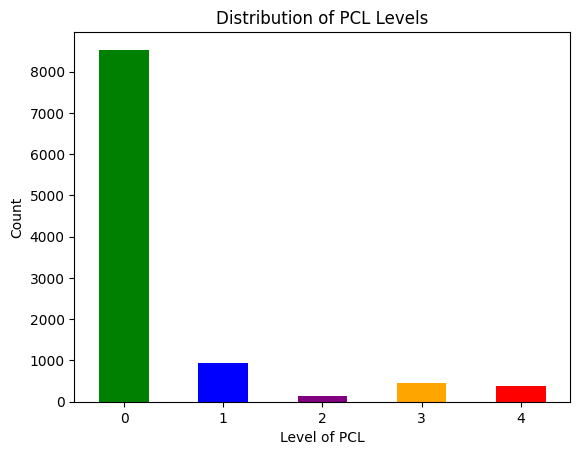

In [146]:
# B] Make a bar plot based on the column label. Put a different color for each label. Put a title and label the axes.
# make the x axis angle 0. sort by the value in the x axis
import matplotlib.pyplot as plt

all_df['label'].value_counts().sort_index().plot(kind='bar', color=['green', 'blue', 'purple', 'orange', 'red'])
plt.title('Distribution of PCL Levels')
plt.xlabel('Level of PCL')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


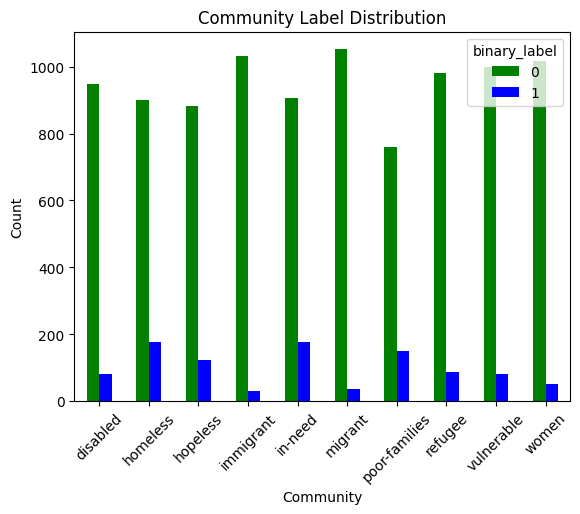

In [147]:
# C] Make a double bar plot where the x axis are different communities and y axis is the count per label class. Each community should have 2 ba plots. Put a different color for each label. Put a title and label the axes.
# make the x axis angle 45

all_df.groupby(['keyword', 'binary_label']).size().unstack().plot(kind='bar', stacked=False, color=['green', 'blue'])
plt.title('Community Label Distribution')
plt.xlabel('Community')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



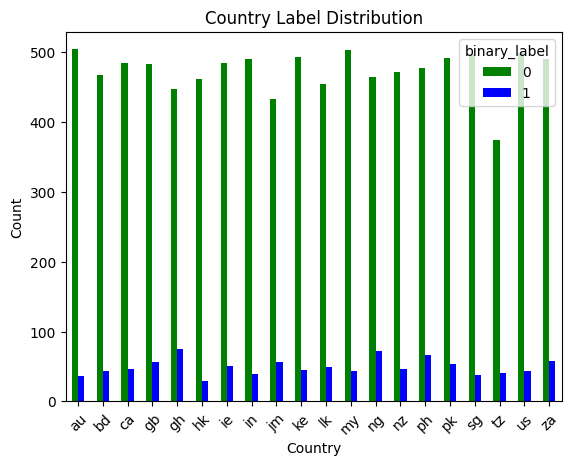

In [148]:
# D] make the same for the column of countries

all_df.groupby(['country_code', 'binary_label']).size().unstack().plot(kind='bar', stacked=False, color=['green', 'blue'])
plt.title('Country Label Distribution')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


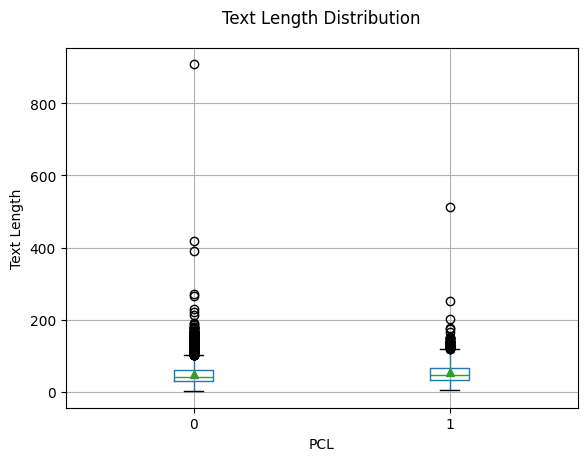

In [149]:
# Calculate the length of each text and put it in a new column. Then make a box plot of the length of the texts. Put a title and label the axes.
# One box plot per ninary label category. Plot the mean and median explicitely in the y axis
# Disable the first title of the two

all_df['text_length'] = all_df['text'].apply(lambda x: len(x.split()))
all_df.boxplot(column='text_length', by='binary_label', showmeans=True, showfliers=True)
plt.title('')
plt.suptitle('Text Length Distribution')
plt.xlabel('PCL')
plt.ylabel('Text Length')
plt.show()



### F1 plots

#### Evaluate the total f1

In [150]:
from transformers import BertModel, BertPreTrainedModel
import torch
from torch.utils.data import DataLoader

In [151]:
path = '/Users/gouse/PycharmProjects/NLP/labs_2023_2024/CW/data/baseline_preprocessed_csvs'
tedf= pd.read_csv(path+'/tedf1.csv')
tedf.dropna(inplace=True)

In [152]:
tedf

,par_id,community,text,label
0,4046,hopeless,We also know that they can benefit by receivin...,1
1,1279,refugee,Pope Francis washed and kissed the feet of Mus...,1
2,8330,refugee,Many refugees do n't want to be resettled anyw...,1
3,4063,in-need,"""Budding chefs , like """" Fred """" , """" Winston ...",1
4,4089,homeless,"""In a 90-degree view of his constituency , one...",1
...,...,...,...,...
2089,10462,homeless,"The sad spectacle , which occurred on Saturday...",0
2090,10463,refugee,""""""" The Pakistani police came to our house and...",0
2091,10464,disabled,"""When Marie O'Donoghue went looking for a spec...",0
2092,10465,women,"""Sri Lankan norms and culture inhibit women fr...",0


In [153]:
tedf_full = all_df[all_df.par_id.isin(tedf.par_id)]
tedf_full

,par_id,art_id,keyword,country_code,text,label,binary_label,text_length
106,107,16900972,homeless,ke,"""His present """" chambers """" may be quite humbl...",3,1,75
148,149,1387882,disabled,us,Krueger recently harnessed that creativity to ...,2,1,54
150,151,19974860,poor-families,in,10:41am - Parents of children who died must ge...,3,1,25
153,154,20663936,disabled,ng,When some people feel causing problem for some...,4,1,101
156,157,21712008,poor-families,ca,We are alarmed to learn of your recently circu...,4,1,101
...,...,...,...,...,...,...,...,...
10462,10463,4676355,refugee,pk,""""""" The Pakistani police came to our house and...",0,0,37
10463,10464,19612634,disabled,ie,"""When Marie O'Donoghue went looking for a spec...",0,0,38
10464,10465,14297363,women,lk,"""Sri Lankan norms and culture inhibit women fr...",1,0,64
10465,10466,70091353,vulnerable,ph,He added that the AFP will continue to bank on...,0,0,43


In [161]:
tedf_full['text_length'].max()

272

In [154]:
import torch
import transformers
from transformers import BertTokenizer
import torch.nn as nn
from torch.utils.data import DataLoader
from tqdm.notebook import tqdm


class PCLDataset(torch.utils.data.Dataset):

    def __init__(self, tokenizer, dataframe):
        self.tokenizer = tokenizer
        self.dataframe = dataframe

    def collate_fn(self, batch):
        #tokenize the text data in the batch
        #convert them from strings of text into tensors of numerical values
        #each item represented by a dictionary with 'text' and 'label' as keys
        #prepare batches from the dataset (includes tokenizing the texts and converting labels to tensors)
        texts = [item['text'] for item in batch]
        labels = torch.tensor([item['label'] for item in batch])

        # Tokenize texts and pad/truncate to a max length of 128 tokens
        encodings = self.tokenizer(texts, return_tensors='pt', padding=True, truncation=True, max_length=128)
        labels = torch.tensor(labels)  #convert list of labels for the current batch into a tensor

        # Add labels to the encodings
        encodings['labels'] = labels

        return encodings
        #collate_fn returns a dictionary containing key-value pairs (the tokenised and encoded representations
        #of the texts and the corresponding labels)
        #also includes attention masks

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        # Retrieve data point from dataframe
        row = self.dataframe.iloc[idx]
        text = row['text']
        label = row['label']
        return {'text': text, 'label': label}

In [155]:
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')
test_dataset = PCLDataset(tokenizer, tedf)

In [156]:
class BERTModelCustom(BertPreTrainedModel):

    def __init__(self, config):
        super().__init__(config)

        # BERT Model
        #self.bert = RobertaModel(config)
        self.bert = BertModel(config)

        # Task A
        self.projection_a = torch.nn.Sequential(torch.nn.Dropout(0.2),
                                                torch.nn.Linear(config.hidden_size, 2))


        #self.projection_a = nn.Sequential(
            #nn.Linear(config.hidden_size, 512),
            #nn.BatchNorm1d(512),
            #nn.ReLU(),
            #nn.Dropout(0.1),
            #nn.Linear(512, 128),
            #nn.BatchNorm1d(128),
            #nn.ReLU(),
            #nn.Dropout(0.1),
            #nn.Linear(128, 2)
        #)

        #self.activation_function = nn.Sigmoid()

        self.init_weights()

        # Freeze Roberta's weights
        # for param in self.bert.parameters():
        #     param.requires_grad = False

    def forward(
        self,
        input_ids=None,
        attention_mask=None,
        token_type_ids=None,
        position_ids=None,
        head_mask=None,
        inputs_embeds=None,
        labels=None,
        output_attentions=None,
        output_hidden_states=None,
        return_dict=None):

        outputs = self.bert(
            input_ids,
            attention_mask=attention_mask,
            token_type_ids=token_type_ids,
            position_ids=position_ids,
            head_mask=head_mask,
            inputs_embeds=inputs_embeds,
            output_attentions=output_attentions,
            output_hidden_states=output_hidden_states,
            return_dict=return_dict,
        )

        # Logits A
        logits = self.projection_a(outputs[1])
        #logits = self.activation_function(logits)

        return logits

In [157]:
from sklearn.metrics import classification_report
import numpy as np

def evaluate(model, tokenizer, data_loader):

    model.eval()  # Set the model to evaluation mode

    total_count = 0
    correct_count = 0

    preds = []
    tot_labels = []

    with torch.no_grad():
        for batch in tqdm(data_loader):
          #every batch is a dictionary containing
          #'input_ids', 'attention_mask' and 'labels'
            input_ids = batch['input_ids']
            attention_mask = batch['attention_mask']
            labels = batch['labels']

            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs #raw model outputs before softmax

            # Move logits and labels to CPU
            logits = logits.detach().cpu().numpy()
            label_ids = labels.to('cpu').numpy()

            # Calculate predictions
            batch_preds = np.argmax(logits, axis=1) #determine predicted class based on the
            #highest logit value of the data sample in the batch
            preds.extend(batch_preds)
            tot_labels.extend(label_ids)

    # Calculate performance metrics
    report = classification_report(tot_labels, preds, target_names=["Not PCL", "PCL"], output_dict=True)

    return report

In [158]:
#your saved model name here

model_name = '/Users/gouse/PycharmProjects/NLP/labs_2023_2024/CW/models/models/final_model/'
model = BERTModelCustom.from_pretrained(model_name)

# we don't batch our test set unless it's too big
validation_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, collate_fn=test_dataset.collate_fn)
#test_loader = DataLoader(test_dataset)

report = evaluate(model, tokenizer, validation_loader)

print(f"F1-score on dev:{report}")

  0%|          | 0/66 [00:00<?, ?it/s]

/var/folders/s6/pzn2mzln089b14702jlw7cqm0000gn/T/ipykernel_69807/1759305414.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels)  #convert list of labels for the current batch into a tensor


F1-score on dev:{'Not PCL': {'precision': 0.9462809917355371, 'recall': 0.9672650475184794, 'f1-score': 0.9566579634464752, 'support': 1894.0}, 'PCL': {'precision': 0.6050955414012739, 'recall': 0.47738693467336685, 'f1-score': 0.5337078651685393, 'support': 199.0}, 'accuracy': 0.9206880076445294, 'macro avg': {'precision': 0.7756882665684055, 'recall': 0.7223259910959231, 'f1-score': 0.7451829143075073, 'support': 2093.0}, 'weighted avg': {'precision': 0.913841476868591, 'recall': 0.9206880076445294, 'f1-score': 0.9164443611735132, 'support': 2093.0}}


#### Evaluate the f1 per type

In [208]:
tedf_full["text_length"].mean()

47.434304825609175

In [193]:
tedf_full[(tedf_full["text_length"] < 100) & (tedf_full["text_length"] > 70)]

,par_id,art_id,keyword,country_code,text,label,binary_label,text_length,text_length_bins
106,107,16900972,homeless,ke,"""His present """" chambers """" may be quite humbl...",3,1,75,"[0,100]"
649,650,26073438,in-need,in,"""When contacted , Yadav said , """" There are tw...",4,1,82,"[0,100]"
1062,1063,16536265,hopeless,nz,""""""" So many of us see the state of our home as...",4,1,86,"[0,100]"
1199,1200,19096840,homeless,lk,"On the eve of the World Refugee Day , UNHCR re...",4,1,77,"[0,100]"
1647,1648,18432489,women,za,"""Mari ? tte Coetzee from Stofberg Family Viney...",3,1,76,"[0,100]"
...,...,...,...,...,...,...,...,...,...
10435,10436,16709748,homeless,in,There are around 90 flyovers in the national c...,0,0,89,"[0,100]"
10440,10441,24581066,migrant,ca,"Now , after four years since he founded the LC...",0,0,83,"[0,100]"
10443,10444,20769616,poor-families,ng,"Desertification which affects Yunusari , Yusuf...",1,0,93,"[0,100]"
10445,10446,13668760,immigrant,nz,I never thought I 'd write this : is there a g...,0,0,73,"[0,100]"


In [202]:
tedf_full[tedf_full["text_length_bins"] == '100-300']

,par_id,art_id,keyword,country_code,text,label,binary_label,text_length,text_length_bins
153,154,20663936,disabled,ng,When some people feel causing problem for some...,4,1,101,100-300
156,157,21712008,poor-families,ca,We are alarmed to learn of your recently circu...,4,1,101,100-300
1207,1208,1812127,vulnerable,ng,It is written in Ecclessiastes in the Bible th...,4,1,165,100-300
2350,2351,23798722,homeless,gh,"""She remembers how hard being homeless hit her...",3,1,120,100-300
4683,4684,4540736,hopeless,pk,"While male prisoners in Pakistan also suffer ,...",3,1,107,100-300
...,...,...,...,...,...,...,...,...,...
10345,10346,24507290,immigrant,ng,"""A Nigerian-American , Alexis Okeowo , shoulde...",0,0,188,100-300
10380,10381,2268760,migrant,us,""""""" The best thing that happened , 3 million p...",0,0,107,100-300
10402,10403,14799035,disabled,ng,"Justice is on crutches in Nigeria , severely e...",0,0,103,100-300
10452,10453,18620867,poor-families,pk,"""Provincial Minister Schools Education Rana Ma...",1,0,177,100-300


In [194]:
all_communities = tedf_full['keyword'].unique().tolist()
all_levels = tedf_full['label'].unique().tolist()
all_text_lengths = tedf_full['text_length'].unique().tolist()

length_bins = ['0-30', '30-50', '50-70', '70-100', '100-300']
tedf_full['text_length_bins'] = pd.cut(tedf_full['text_length'], bins=[0, 30, 50, 70, 100, 300], labels=length_bins)

tedf_full

/var/folders/s6/pzn2mzln089b14702jlw7cqm0000gn/T/ipykernel_69807/3155366362.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tedf_full['text_length_bins'] = pd.cut(tedf_full['text_length'], bins=[0, 30, 50, 70, 100, 300], labels=length_bins)


,par_id,art_id,keyword,country_code,text,label,binary_label,text_length,text_length_bins
106,107,16900972,homeless,ke,"""His present """" chambers """" may be quite humbl...",3,1,75,70-100
148,149,1387882,disabled,us,Krueger recently harnessed that creativity to ...,2,1,54,50-70
150,151,19974860,poor-families,in,10:41am - Parents of children who died must ge...,3,1,25,0-30
153,154,20663936,disabled,ng,When some people feel causing problem for some...,4,1,101,100-300
156,157,21712008,poor-families,ca,We are alarmed to learn of your recently circu...,4,1,101,100-300
...,...,...,...,...,...,...,...,...,...
10462,10463,4676355,refugee,pk,""""""" The Pakistani police came to our house and...",0,0,37,30-50
10463,10464,19612634,disabled,ie,"""When Marie O'Donoghue went looking for a spec...",0,0,38,30-50
10464,10465,14297363,women,lk,"""Sri Lankan norms and culture inhibit women fr...",1,0,64,50-70
10465,10466,70091353,vulnerable,ph,He added that the AFP will continue to bank on...,0,0,43,30-50


In [195]:
f1_scores = []

for bin in length_bins:
    
    test_dataset = tedf_full[tedf_full['text_length_bins'] == bin]
    test_dataset = test_dataset.drop(columns=['label'])
    test_dataset = test_dataset.rename(columns={'binary_label': 'label'})
    test_dataset = PCLDataset(tokenizer, test_dataset)
    
    # we don't batch our test set unless it's too big
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, collate_fn=test_dataset.collate_fn)
    #test_loader = DataLoader(test_dataset)
    
    report = evaluate(model, tokenizer, test_loader)
    print(report['PCL']['f1-score'])
    f1_scores.append(report['PCL']['f1-score'])
    

  0%|          | 0/18 [00:00<?, ?it/s]

/var/folders/s6/pzn2mzln089b14702jlw7cqm0000gn/T/ipykernel_69807/1759305414.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels)  #convert list of labels for the current batch into a tensor


0.5915492957746479


  0%|          | 0/26 [00:00<?, ?it/s]

/var/folders/s6/pzn2mzln089b14702jlw7cqm0000gn/T/ipykernel_69807/1759305414.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels)  #convert list of labels for the current batch into a tensor


0.5263157894736842


  0%|          | 0/13 [00:00<?, ?it/s]

/var/folders/s6/pzn2mzln089b14702jlw7cqm0000gn/T/ipykernel_69807/1759305414.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels)  #convert list of labels for the current batch into a tensor


0.4788732394366197


  0%|          | 0/8 [00:00<?, ?it/s]

/var/folders/s6/pzn2mzln089b14702jlw7cqm0000gn/T/ipykernel_69807/1759305414.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels)  #convert list of labels for the current batch into a tensor


0.5172413793103449


  0%|          | 0/4 [00:00<?, ?it/s]

/var/folders/s6/pzn2mzln089b14702jlw7cqm0000gn/T/ipykernel_69807/1759305414.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels)  #convert list of labels for the current batch into a tensor


0.6086956521739131


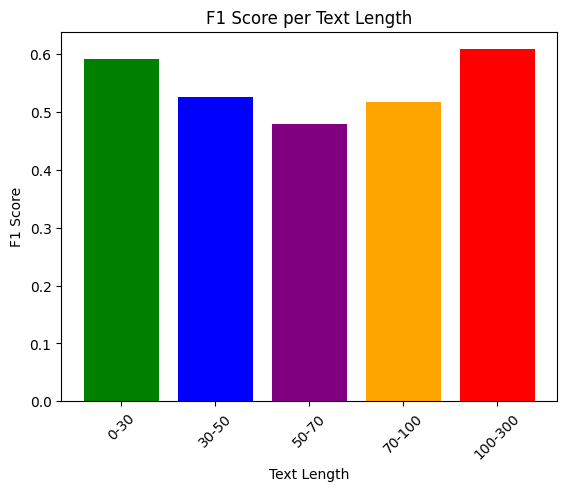

In [196]:
# plot the f1 scores against the length bins in a bar plot. use a different color for each pl

plt.bar(length_bins, f1_scores, color=['green', 'blue', 'purple', 'orange', 'red', 'yellow', 'pink'])
plt.title('F1 Score per Text Length')
plt.xlabel('Text Length')
plt.ylabel('F1 Score')
plt.xticks(rotation=45)
plt.show()


In [173]:
f1_scores = []

for community in all_communities:
    
    test_dataset = tedf_full[tedf_full['keyword'] == community]
    test_dataset = test_dataset.drop(columns=['label'])
    test_dataset = test_dataset.rename(columns={'binary_label': 'label'})
    test_dataset = PCLDataset(tokenizer, test_dataset)
    
    # we don't batch our test set unless it's too big
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, collate_fn=test_dataset.collate_fn)
    #test_loader = DataLoader(test_dataset)
    
    report = evaluate(model, tokenizer, test_loader)
    print(report['PCL']['f1-score'])
    f1_scores.append(report['PCL']['f1-score'])
    

  0%|          | 0/7 [00:00<?, ?it/s]

/var/folders/s6/pzn2mzln089b14702jlw7cqm0000gn/T/ipykernel_69807/1759305414.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels)  #convert list of labels for the current batch into a tensor


0.5384615384615384


  0%|          | 0/7 [00:00<?, ?it/s]

/var/folders/s6/pzn2mzln089b14702jlw7cqm0000gn/T/ipykernel_69807/1759305414.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels)  #convert list of labels for the current batch into a tensor


0.4166666666666667


  0%|          | 0/6 [00:00<?, ?it/s]

/var/folders/s6/pzn2mzln089b14702jlw7cqm0000gn/T/ipykernel_69807/1759305414.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels)  #convert list of labels for the current batch into a tensor


0.5352112676056338


  0%|          | 0/8 [00:00<?, ?it/s]

/var/folders/s6/pzn2mzln089b14702jlw7cqm0000gn/T/ipykernel_69807/1759305414.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels)  #convert list of labels for the current batch into a tensor


0.7297297297297297


  0%|          | 0/8 [00:00<?, ?it/s]

/var/folders/s6/pzn2mzln089b14702jlw7cqm0000gn/T/ipykernel_69807/1759305414.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels)  #convert list of labels for the current batch into a tensor


0.1111111111111111


  0%|          | 0/6 [00:00<?, ?it/s]

/var/folders/s6/pzn2mzln089b14702jlw7cqm0000gn/T/ipykernel_69807/1759305414.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels)  #convert list of labels for the current batch into a tensor


0.47619047619047616


  0%|          | 0/7 [00:00<?, ?it/s]

/var/folders/s6/pzn2mzln089b14702jlw7cqm0000gn/T/ipykernel_69807/1759305414.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels)  #convert list of labels for the current batch into a tensor


0.3333333333333333


  0%|          | 0/7 [00:00<?, ?it/s]

/var/folders/s6/pzn2mzln089b14702jlw7cqm0000gn/T/ipykernel_69807/1759305414.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels)  #convert list of labels for the current batch into a tensor


0.5


  0%|          | 0/7 [00:00<?, ?it/s]

/var/folders/s6/pzn2mzln089b14702jlw7cqm0000gn/T/ipykernel_69807/1759305414.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels)  #convert list of labels for the current batch into a tensor


0.4444444444444444


  0%|          | 0/7 [00:00<?, ?it/s]

/var/folders/s6/pzn2mzln089b14702jlw7cqm0000gn/T/ipykernel_69807/1759305414.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels)  #convert list of labels for the current batch into a tensor


0.5454545454545454


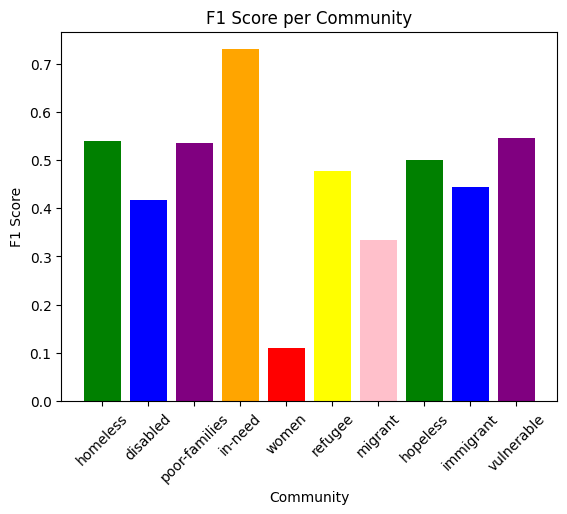

In [174]:
# plot the f1 scores for each community in a bar plot. use a different color for each plot

plt.bar(all_communities, f1_scores, color=['green', 'blue', 'purple', 'orange', 'red', 'yellow', 'pink'])
plt.title('F1 Score per Community')
plt.xlabel('Community')
plt.ylabel('F1 Score')
plt.xticks(rotation=45)
plt.show()


In [175]:
f1_scores = []

for level in [2,3,4]:
    
    test_dataset = tedf_full[tedf_full['label'] == level]
    test_dataset = test_dataset.drop(columns=['label'])
    test_dataset = test_dataset.rename(columns={'binary_label': 'label'})
    test_dataset = PCLDataset(tokenizer, test_dataset)
    
    # we don't batch our test set unless it's too big
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, collate_fn=test_dataset.collate_fn)
    #test_loader = DataLoader(test_dataset)
    
    report = evaluate(model, tokenizer, test_loader)
    print(report['PCL']['f1-score'])
    f1_scores.append(report['PCL']['f1-score'])

  0%|          | 0/1 [00:00<?, ?it/s]

/var/folders/s6/pzn2mzln089b14702jlw7cqm0000gn/T/ipykernel_69807/1759305414.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels)  #convert list of labels for the current batch into a tensor


0.36363636363636365


/Users/gouse/PycharmProjects/NLP/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/gouse/PycharmProjects/NLP/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/gouse/PycharmProjects/NLP/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

  0%|          | 0/3 [00:00<?, ?it/s]

/var/folders/s6/pzn2mzln089b14702jlw7cqm0000gn/T/ipykernel_69807/1759305414.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels)  #convert list of labels for the current batch into a tensor


0.576


/Users/gouse/PycharmProjects/NLP/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/gouse/PycharmProjects/NLP/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/gouse/PycharmProjects/NLP/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

  0%|          | 0/3 [00:00<?, ?it/s]

/var/folders/s6/pzn2mzln089b14702jlw7cqm0000gn/T/ipykernel_69807/1759305414.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels)  #convert list of labels for the current batch into a tensor


0.7482993197278912


/Users/gouse/PycharmProjects/NLP/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/gouse/PycharmProjects/NLP/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/gouse/PycharmProjects/NLP/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

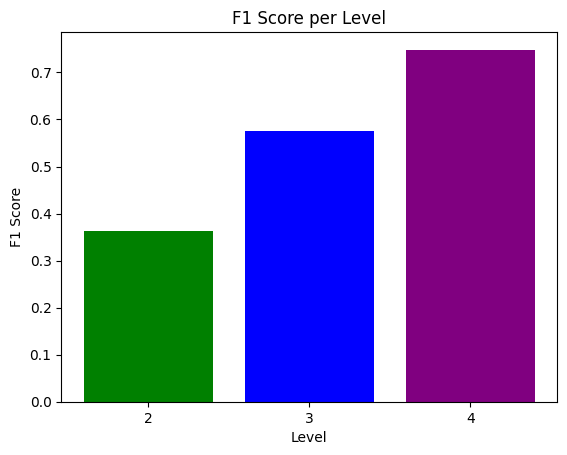

In [176]:
# plot the f1 scores for each level in a bar plot. use a different color for each plot. make the x axis to have only 3 ticks

plt.bar([2,3,4], f1_scores, color=['green', 'blue', 'purple'])
plt.title('F1 Score per Level')
plt.xlabel('Level')
plt.ylabel('F1 Score')
plt.xticks([2,3,4])
plt.show()
